### Imports ###

In [13]:
import time
import corner
from tqdm import tqdm
import matplotlib.pyplot as plt

import numpy as np

import jax
import jax.numpy as jnp
import blackjax
from blackjax.ns.utils import finalise, log_weights
print(jax.devices())

from data import get_data
from prior import prior_dists, logprior, sample_from_priors
from loglikelihood import loglikelihood
from model import jax_stream_model

[CpuDevice(id=0)]


### Get the Data ###

In [2]:
# Get data
q_true = 0.8
seed   = 42
sigma  = 1
n_live = 500
PATH_SAVE = f'./'

dict_data = get_data(q_true, seed, sigma)

### Load the Samples ###

In [ ]:
samps_100 = np.load('samples/samps_q0.8_sig1_seed42_nlive100.npy')
samps_500 = np.load('samples/samps_q0.8_sig1_seed42_nlive500.npy')

### Plot the Posteriors ###

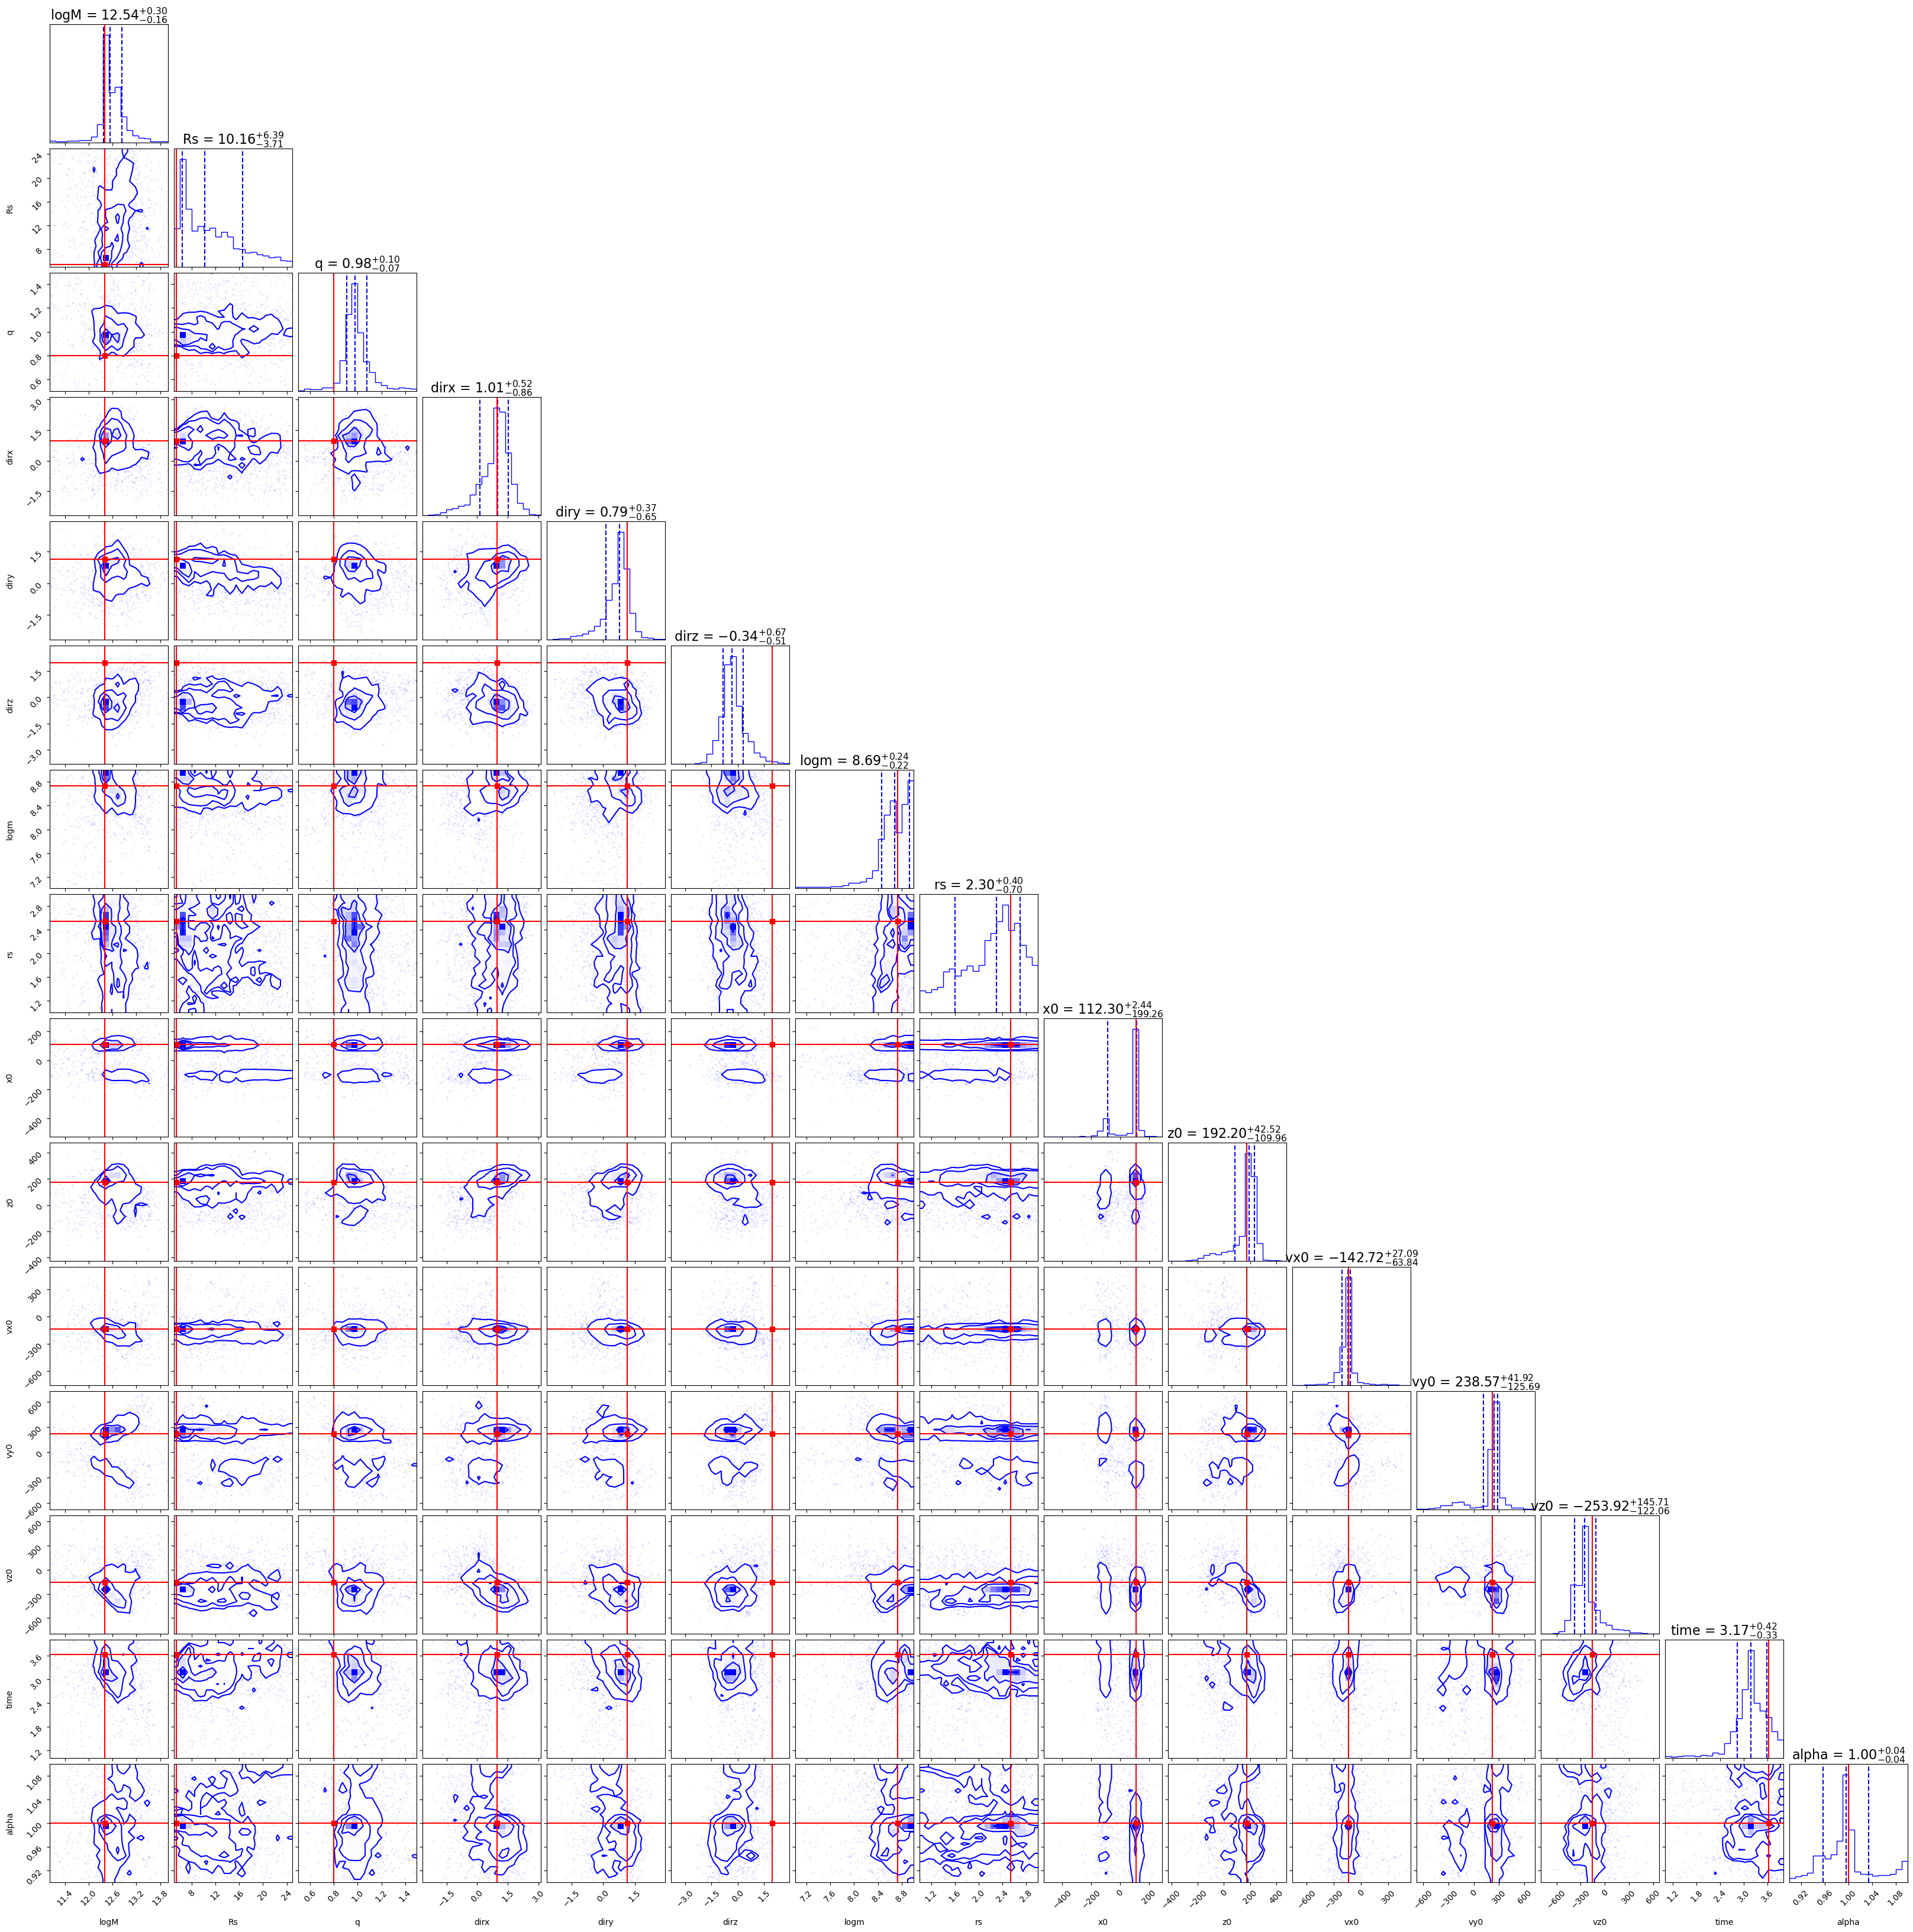

In [35]:
labels = ['logM', 'Rs', 'q', 'dirx', 'diry', 'dirz', 'logm', 'rs', 'x0', 'z0', 'vx0', 'vy0', 'vz0', 'time', 'alpha']
ground_truth = np.concatenate( [dict_data['params'], [1]])
figure = corner.corner(samps_100, 
            labels=labels,
            color='blue',
            quantiles=[0.16, 0.5, 0.84],
            show_titles=True, 
            title_kwargs={"fontsize": 16},
            truths=ground_truth, 
            truth_color='red')
plt.savefig(f'plots/corner_q0.8_sig1_seed42_nlive100.pdf')

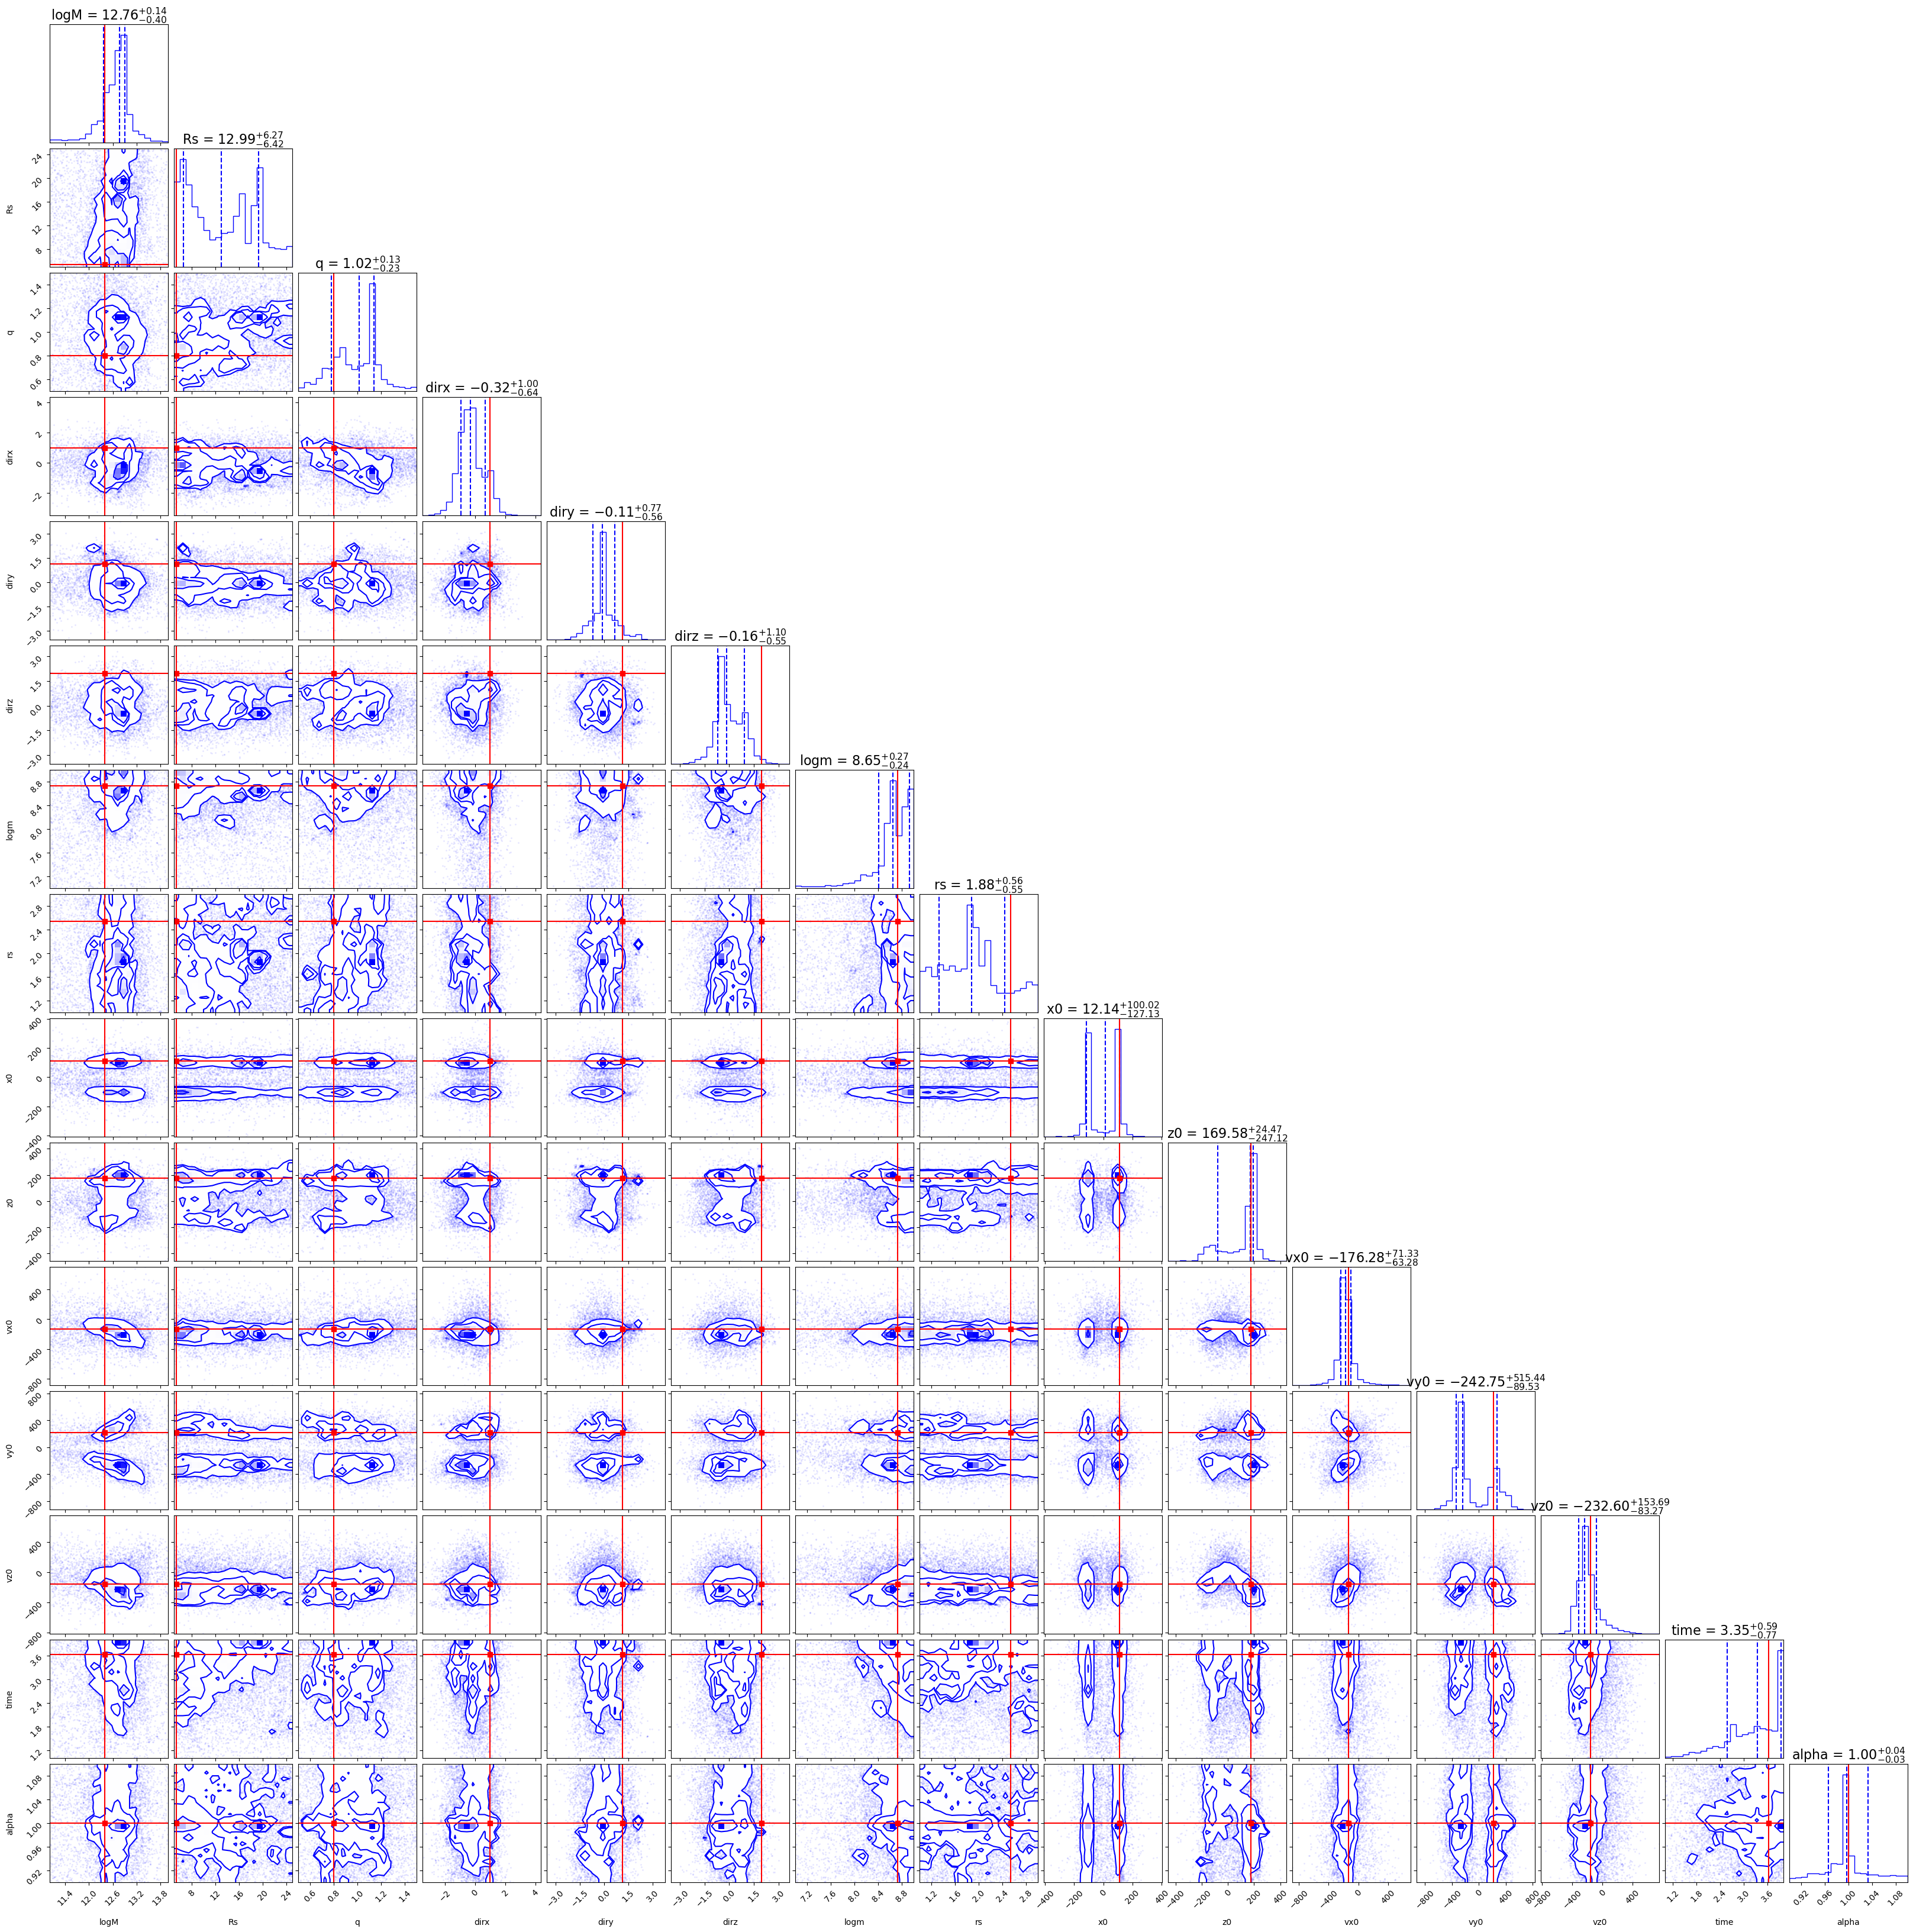

In [36]:
labels = ['logM', 'Rs', 'q', 'dirx', 'diry', 'dirz', 'logm', 'rs', 'x0', 'z0', 'vx0', 'vy0', 'vz0', 'time', 'alpha']
ground_truth = np.concatenate( [dict_data['params'], [1]])
figure = corner.corner(samps_500, 
            labels=labels,
            color='blue',
            quantiles=[0.16, 0.5, 0.84],
            show_titles=True, 
            title_kwargs={"fontsize": 16},
            truths=ground_truth, 
            truth_color='red')
plt.savefig(f'plots/corner_q0.8_sig1_seed42_nlive500.pdf')

### Plot the best fits ###

In [11]:
logl_100, logl_500 = [], []
for i in tqdm(range(len(samps_500)), leave=True):
    if i < len(samps_100):
        logl_100.append(loglikelihood(samps_100[i], dict_data))
    logl_500.append(loglikelihood(samps_500[i], dict_data))
logl_100 = np.array(logl_100)
logl_500 = np.array(logl_500)

100%|██████████| 16000/16000 [36:52<00:00,  7.23it/s] 


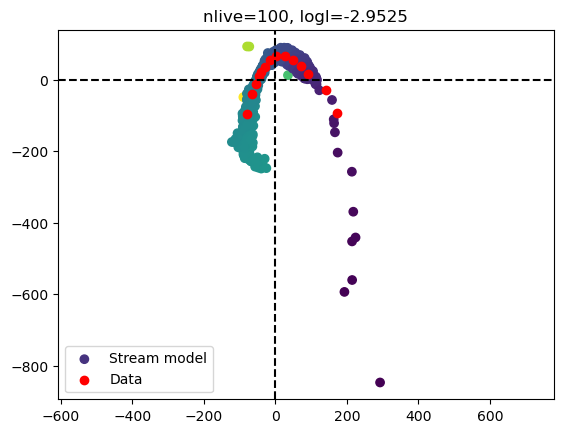

In [37]:
logM, Rs, q, dirx, diry, dirz, logm, rs, x0, z0, vx0, vy0, vz0, time, alpha = samps_100[np.argmax(logl_100)]
dirz = jnp.abs(dirz)
x0   = jnp.abs(x0)
y0   = 0.0
z0   = jnp.abs(z0)
vy0  = jnp.abs(vy0)
theta_stream, x_stream, y_stream, vz_stream, r_meds, w_meds, x_meds, y_meds, vz_meds = jax_stream_model(logM, Rs, q, dirx, diry, dirz, logm, rs, x0, y0, z0, vx0, vy0, vz0, time, alpha, tail=1, min_count=11)

plt.title(f'nlive=100, logl={np.max(logl_100):.4f}')
plt.scatter(x_stream, y_stream, c=theta_stream, label='Stream model')
plt.scatter(dict_data['x_meds'], dict_data['y_meds'], c='r', label='Data')
plt.legend(loc='best')
plt.axis('equal')
plt.axvline(0, c='k', ls='--')
plt.axhline(0, c='k', ls='--')
plt.savefig(f'plots/best_fit_q0.8_sig1_seed42_nlive100.pdf')

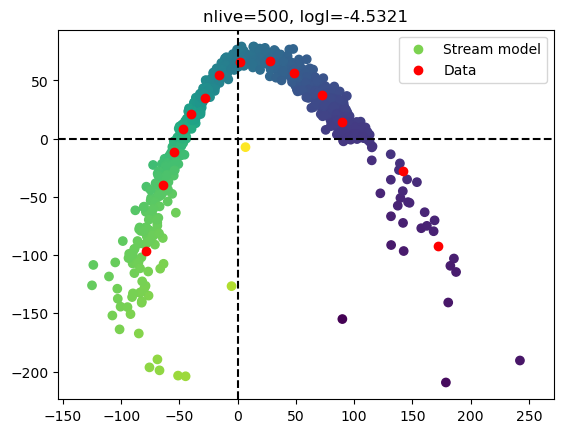

In [38]:
logM, Rs, q, dirx, diry, dirz, logm, rs, x0, z0, vx0, vy0, vz0, time, alpha = samps_500[np.argmax(logl_500)]
dirz = jnp.abs(dirz)
x0   = jnp.abs(x0)
y0   = 0.0
z0   = jnp.abs(z0)
vy0  = jnp.abs(vy0)
theta_stream, x_stream, y_stream, vz_stream, r_meds, w_meds, x_meds, y_meds, vz_meds = jax_stream_model(logM, Rs, q, dirx, diry, dirz, logm, rs, x0, y0, z0, vx0, vy0, vz0, time, alpha, tail=1, min_count=11)

plt.title(f'nlive=500, logl={np.max(logl_500):.4f}')
plt.scatter(x_stream, y_stream, c=theta_stream, label='Stream model')
plt.scatter(dict_data['x_meds'], dict_data['y_meds'], c='r', label='Data')
plt.legend(loc='best')
plt.axis('equal')
plt.axvline(0, c='k', ls='--')
plt.axhline(0, c='k', ls='--')
plt.savefig(f'plots/best_fit_q0.8_sig1_seed42_nlive500.pdf')